<a href="https://colab.research.google.com/github/AlexandreKc/EDA_FundamentosML_SebastianCarrera/blob/EV_1_ML/Analisis_DS_Employee.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importaciones
import numpy as  np                      #Programación vectorial
import matplotlib.pyplot as plt          #Visualización
import pandas as pd                      #Estructura y manipulación de datos
import seaborn as sns                    #complemento matplotlib para graficar
import scipy.stats as stats              #Scipy stats tiene varias funciones estadisticas
from scipy.stats import shapiro  # Asegúrate de importar correctamente la función

In [ ]:
#Subida dataset
from google.colab import files
uploaded = files.upload() #Se sube el archivo de forma local https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset?resource=download
for fn in uploaded.keys():
    name=fn
df = pd.read_csv(name, sep=",")

Saving WA_Fn-UseC_-HR-Employee-Attrition.csv to WA_Fn-UseC_-HR-Employee-Attrition (3).csv


In [ ]:
#ver primeras 10 filas
df.head(10)


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1460,29,No,Travel_Rarely,468,Research & Development,28,4,Medical,1,2054,...,2,80,0,5,3,1,5,4,0,4
1461,50,Yes,Travel_Rarely,410,Sales,28,3,Marketing,1,2055,...,2,80,1,20,3,3,3,2,2,0
1462,39,No,Travel_Rarely,722,Sales,24,1,Marketing,1,2056,...,1,80,1,21,2,2,20,9,9,6
1463,31,No,Non-Travel,325,Research & Development,5,3,Medical,1,2057,...,2,80,0,10,2,3,9,4,1,7
1464,26,No,Travel_Rarely,1167,Sales,5,3,Other,1,2060,...,4,80,0,5,2,3,4,2,0,0
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8
1469,34,No,Travel_Rarely,628,Research & Development,8,3,Medical,1,2068,...,1,80,0,6,3,4,4,3,1,2


In [ ]:
#Medidas de tendencia central
#media de distancia a casa DISTANCEFROMHOME
media_distancia = df["DistanceFromHome"].mean()
media_truncada = int(media_distancia)  #se trunca la parte decimal
print(f"La media de 'DistanceFromHome': {media_truncada}")
#mediana de años trabajados YearsAtCompany
anios_trabajados = df["YearsAtCompany"].median()
anios_truncados = int(anios_trabajados)  #se trunca la parte decimal
print(f"La mediana de 'YearsAtCompany': {anios_trabajados}")
#moda de campo de estudio EducationField
moda_estudio = df["EducationField"].mode().iloc[0] #iloc muestra solamente el primer valor que más se repite
print(f"La moda de 'EducationField': {moda_estudio}")

La media de 'DistanceFromHome': 9
La mediana de 'YearsAtCompany': 5.0
La moda de 'EducationField': Life Sciences


In [ ]:
#Medidas de dispersión
#Desviacion estandar,rango y quartiles de DistanceFromHome
#desv
desviacion_estandar = df["DistanceFromHome"].std()
desviacion_estandar_truncada = int(desviacion_estandar)
print(f"La desviación estándar de 'DistanceFromHome': {desviacion_estandar_truncada}")
#rango
rango = df["DistanceFromHome"].max() - df["DistanceFromHome"].min()
print(f"El rango de 'DistanceFromHome': {rango}")
#quart
prim_cuar,seg_cuar,terc_cuar=df['DistanceFromHome'].quantile([.25, .5, .75])
print(f"El primer cuartil de 'DistanceFromHome': {prim_cuar}, el segundo cuartil de 'DistanceFromHome': {seg_cuar}, el tercer cuartil de 'DistanceFromHome': {terc_cuar}")
#varianza
varianza = df["DistanceFromHome"].var()
varianza_truncada = int(varianza)
print(f"La varianza de 'DistanceFromHome': {varianza_truncada}")

#Media
media = df["DistanceFromHome"].mean()
#Coeficiente de Variación (CV)
cv = (desviacion_estandar / media) * 100  #este valor esta en porcentaje
if cv < 10:
    print("Baja dispersión: Los valores están cerca de la media.")
elif cv > 30:
    print("Alta dispersión: Los valores están muy dispersos respecto a la media.")
else:
    print(" Dispersión moderada.")


La desviación estándar de 'DistanceFromHome': 8
El rango de 'DistanceFromHome': 28
El primer cuartil de 'DistanceFromHome': 2.0, el segundo cuartil de 'DistanceFromHome': 7.0, el tercer cuartil de 'DistanceFromHome': 14.0
La varianza de 'DistanceFromHome': 65
Alta dispersión: Los valores están muy dispersos respecto a la media.


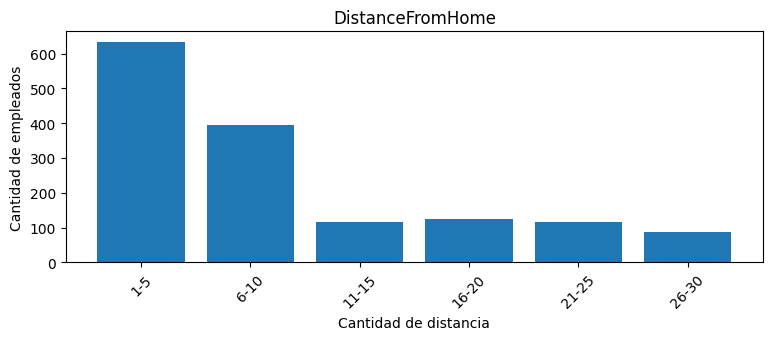

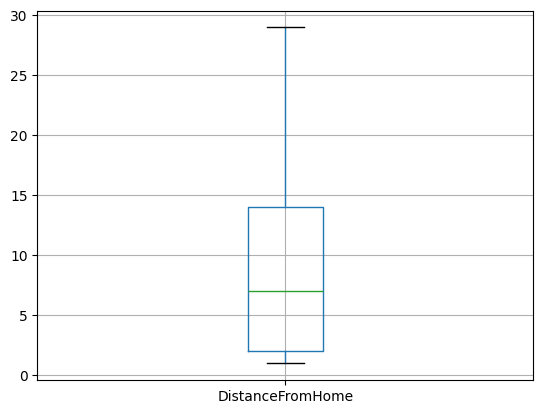

In [ ]:
#Grafico de barra en intervalos y también de caja
def bar_plot(variable):
    # Obtener la variable
    var = df[variable]
    # Definir los intervalos específicos
    bins = [1, 6, 11, 16, 21, 26, 31]  # Definición de los intervalos (1-5, 6-10, ..., 26-30)
    labels = ['1-5', '6-10', '11-15', '16-20', '21-25', '26-30']  # Etiquetas para los intervalos
    # Asignar los intervalos a los valores de la variable
    var_binned = pd.cut(var, bins=bins, labels=labels, right=False)
    # Contar los valores por intervalo
    varValue = var_binned.value_counts().sort_index()
    # Formato gráfico
    plt.figure(figsize=(9, 3))
    plt.bar(varValue.index, varValue)
    plt.xticks(rotation=45)
    plt.ylabel("Cantidad de empleados")
    plt.xlabel("Cantidad de distancia")
    plt.title(variable)
    plt.show()


bar_plot("DistanceFromHome")
df.boxplot(column="DistanceFromHome")
plt.show()

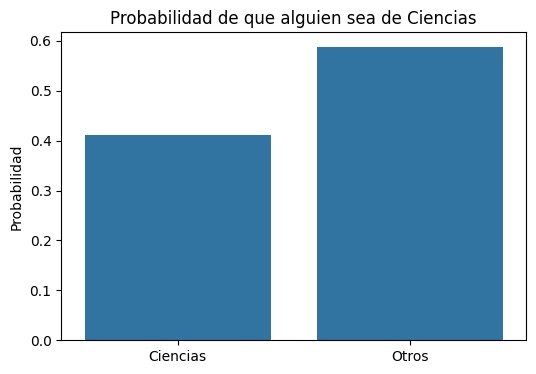

In [ ]:
# Filtrar y calcular la probabilidad de que alguien esté en el campo de Ciencias
campo_ciencias = df['EducationField'] == 'Life Sciences'
probabilidad_ciencias = campo_ciencias.mean()  # Proporción de empleados en Ciencias

# graficar
plt.figure(figsize=(6, 4))
sns.barplot(x=['Ciencias', 'Otros'], y=[probabilidad_ciencias, 1 - probabilidad_ciencias])

# Configurar el gráfico
plt.ylabel('Probabilidad')
plt.title('Probabilidad de que empleado se encuentre en el area de Ciencias')
plt.show()

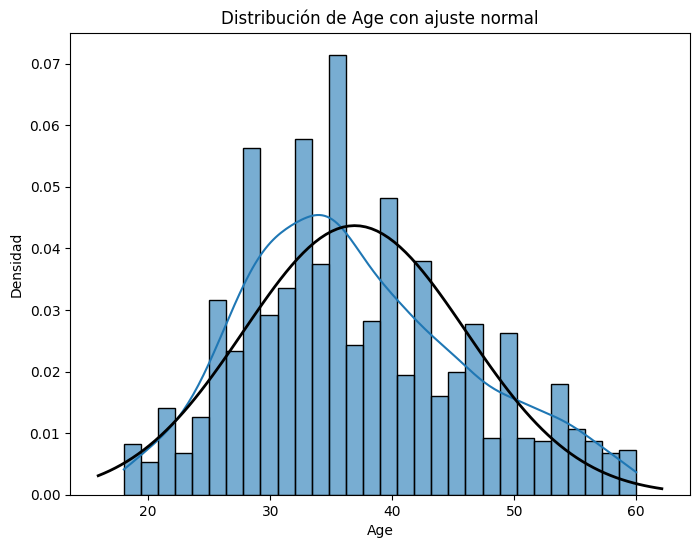

Estadístico de la prueba: 0.9774491149124374, p-valor: 2.036924313471409e-14
Los datos no siguen una distribución normal (se rechaza H0).


In [ ]:
#Distribución de Edad

data = df['Age']

# Gráfico de distribución con histograma y línea de densidad ajustada
plt.figure(figsize=(8, 6))
sns.histplot(data, kde=True, stat="density", bins=30, alpha=0.6)
# Añadimos la curva de una distribución normal ajustada
mu, std = stats.norm.fit(data)  # Calculo media y distest
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, mu, std)  # Función de densidad de probabilidad normal
plt.plot(x, p, 'k', linewidth=2)

plt.title('Distribución de Age con ajuste normal')
plt.xlabel('Age')
plt.ylabel('Densidad')
plt.show()

# Prueba de normalidad
stat, p_value = shapiro(data)
print(f"Estadístico de la prueba: {stat}, p-valor: {p_value}")

# Decisión sobre normalidad
if p_value > 0.05:
    print("Los datos siguen una distribución normal (no se rechaza H0).")
else:
    print("Los datos no siguen una distribución normal (se rechaza H0).")